#Simple linear regresssion

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
df=pd.read_csv('appliance_energy.csv')

df.head()

,Temperature (°C),Energy Consumption (kWh)
0,22.490802,2.292604
1,34.014286,3.251925
2,29.639879,3.009868
3,26.973170,1.703533
4,18.120373,1.702201


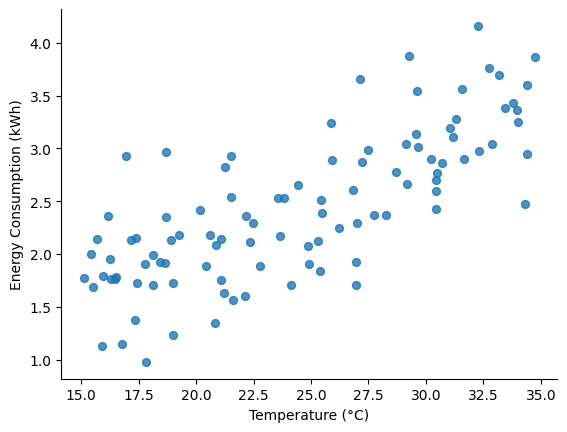

In [16]:
#@title Temperature (°C) vs Energy Consumption (kWh)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Temperature (°C)', y='Energy Consumption (kWh)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
df.describe()

,Temperature (°C),Energy Consumption (kWh)
count,100.000000,100.000000
mean,24.403615,2.439821
std,5.949788,0.693527
min,15.110442,0.978107
25%,18.864015,1.908640
50%,24.282849,2.364121
75%,29.604062,2.931199
max,34.737739,4.159094


In [18]:
print(df.isnull().sum())

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


In [19]:
x=df['Temperature (°C)']
y=df['Energy Consumption (kWh)']

In [21]:
#split the data into training
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
x_test.head()

,Temperature (°C)
83,16.271167
53,32.896547
70,30.444895
45,28.250446
44,20.175600


In [23]:
# prompt: #split the data into training y

x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [27]:
y_test.shape

(20, 1)

In [30]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred=model.predict(x_test)

In [32]:
y_pred

array([[1.6858187 ],
       [3.18154068],
       [2.96097494],
       [2.76354868],
       [2.0370856 ],
       [2.36343345],
       [2.09711944],
       [3.12445907],
       [1.60849483],
       [2.24537556],
       [2.34866555],
       [2.66462648],
       [3.0387357 ],
       [3.27880886],
       [1.78664542],
       [1.85218469],
       [2.95922164],
       [1.70468695],
       [3.0692904 ],
       [1.87828475]])

In [33]:
#calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

#calculate R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared Value:", r2)

Mean Squared Error: 0.16342487842925055
R-squared Value: 0.6119478445218713


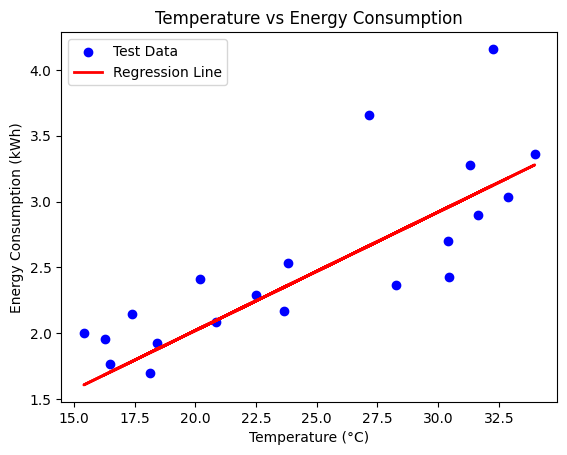

In [34]:
plt.scatter(x_test, y_test, color='blue', label='Test Data')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Temperature vs Energy Consumption')
plt.legend()

In [35]:
#save model to file
import joblib
joblib.dump(model, 'appliance_energy_model.pkl')

['appliance_energy_model.pkl']

In [39]:
#load the model
model = joblib.load('appliance_energy_model.pkl')

In [40]:
temp = np.array([[22.49]])

In [41]:
#energy prediction
prediction = model.predict(temp)
print("Predicted Energy Consumption:", prediction)

Predicted Energy Consumption: [[2.24530337]]


In [37]:
import joblib

# Load the model from the file
model = joblib.load('appliance_energy_model.pkl')

# Example data for prediction
new_data = np.array([[22.49]])

# Make predictions
predictions = model.predict(new_data)

# Print the predictions
print(predictions)

[[2.24530337]]


In [38]:
import joblib

# Loading the saved model
loaded_model = joblib.load('appliance_energy_model.pkl')

# Example temperatures for prediction
temperatures = [20, 22, 24, 26, 28, 30]
for temperature in temperatures:
    # Making the prediction
    predicted_energy = loaded_model.predict([[temperature]])
    # Displaying the prediction
    print(f"Predicted energy consumption at {temperature}°C: {predicted_energy[0]} kWh")

Predicted energy consumption at 20°C: [2.02128757] kWh
Predicted energy consumption at 22°C: [2.20121994] kWh
Predicted energy consumption at 24°C: [2.38115231] kWh
Predicted energy consumption at 26°C: [2.56108467] kWh
Predicted energy consumption at 28°C: [2.74101704] kWh
Predicted energy consumption at 30°C: [2.9209494] kWh
